# DATA VISUALIZATION AND PRE-PROCESSING

## Download the dataset:
Dataset was downloaded successfully as Churn_Modelling.csv

## Load the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
ob=pd.read_csv("Churn_Modelling.csv")

## Performing the following analysis

## a) Univariate Analysis

C:\Users\Sanjana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

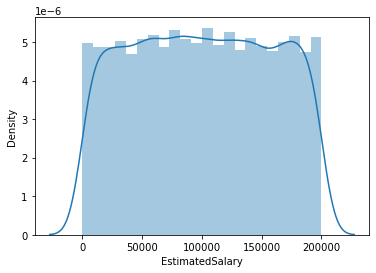

In [3]:
sns.distplot(ob['EstimatedSalary'])

Text(0.5, 0, 'Age')

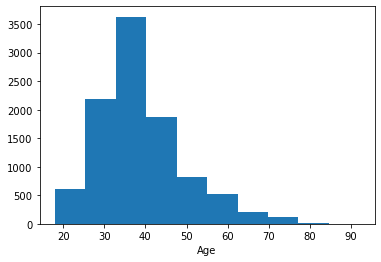

In [4]:
plt.hist(ob['Age']);
plt.xlabel('Age')

<AxesSubplot:ylabel='Gender'>

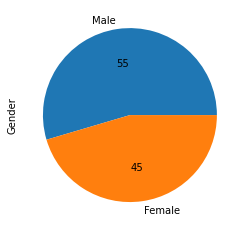

In [5]:
ob['Gender'].value_counts().plot(kind='pie',autopct='%.0f')

## b)Bi - Variate Analysis

C:\Users\Sanjana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumOfProducts', ylabel='EstimatedSalary'>

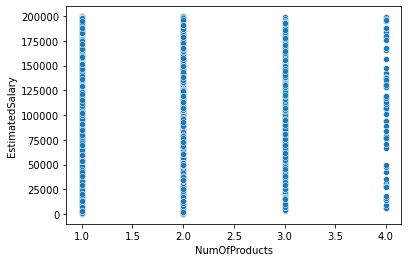

In [6]:
sns.scatterplot(ob['NumOfProducts'],ob['EstimatedSalary'])

<BarContainer object of 10000 artists>

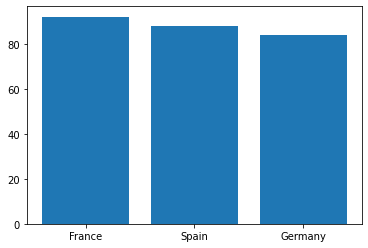

In [7]:
plt.bar(ob.Geography, ob.Age)

## c)Multi - Variate Analysis

C:\Users\Sanjana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Balance'>

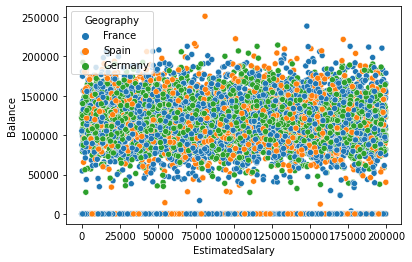

In [8]:
sns.scatterplot(ob['EstimatedSalary'],ob['Balance'],ob['Geography'])

<AxesSubplot:>

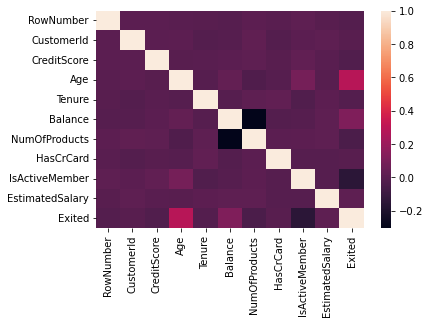

In [9]:
sns.heatmap(ob.corr())

## Perform descriptive statistics on the dataset.

In [10]:
ob.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Handle the Missing values

In [11]:
ob.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
ob.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

## Find the outliers and replace the outliers

C:\Users\Sanjana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance'>

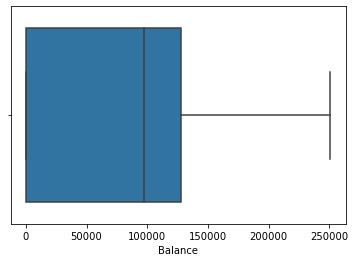

In [13]:
sns.boxplot(ob['Balance'])

In [14]:
quant=ob.quantile([0.85,0.25])
quant

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.85,8500.15,15777904.45,754.0,49.0,8.0,140895.0965,2.0,1.0,1.0,170322.3935,1.0
0.25,2500.75,15628528.25,584.0,32.0,3.0,0.0000,1.0,0.0,0.0,51002.1100,0.0


In [15]:
intrQuantRnge = quant.iloc[0]-quant.iloc[1]
intrQuantRnge

RowNumber            5999.4000
CustomerId         149376.2000
CreditScore           170.0000
Age                    17.0000
Tenure                  5.0000
Balance            140895.0965
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary    119320.2835
Exited                  1.0000
dtype: float64

In [16]:
upper = quant.iloc[0] + (1.5*intrQuantRnge)
upper

RowNumber          1.749925e+04
CustomerId         1.600197e+07
CreditScore        1.009000e+03
Age                7.450000e+01
Tenure             1.550000e+01
Balance            3.522377e+05
NumOfProducts      3.500000e+00
HasCrCard          2.500000e+00
IsActiveMember     2.500000e+00
EstimatedSalary    3.493028e+05
Exited             2.500000e+00
dtype: float64

In [17]:
lower = quant.iloc[1]-(1.5*intrQuantRnge)
lower

RowNumber         -6.498350e+03
CustomerId         1.540446e+07
CreditScore        3.290000e+02
Age                6.500000e+00
Tenure            -4.500000e+00
Balance           -2.113426e+05
NumOfProducts     -5.000000e-01
HasCrCard         -1.500000e+00
IsActiveMember    -1.500000e+00
EstimatedSalary   -1.279783e+05
Exited            -1.500000e+00
dtype: float64

C:\Users\Sanjana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance'>

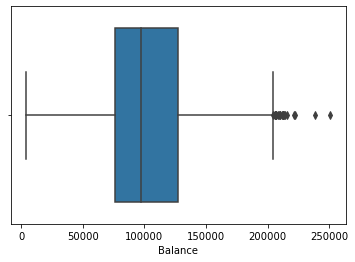

In [18]:
ob['Balance']=np.where(ob['Balance']<5.4, 7.648589e+04,ob['Balance'])
sns.boxplot(ob['Balance'])

## Check for Categorical columns and perform encoding

In [19]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
L=LabelEncoder()
O=OneHotEncoder()
ob['Gender']=L.fit_transform(ob['Gender'])
ob['Geography']=L.fit_transform(ob['Geography'])

ob.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,0,1,39,5,76485.89,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7,76485.89,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,0,0,28,4,130142.79,1,1,0,38190.78,0


## Split the data into dependent and independent variables

In [20]:
x=ob.iloc[:,0:1]
x

,RowNumber
0,1
1,2
2,3
3,4
4,5
...,...
9995,9996
9996,9997
9997,9998
9998,9999


In [21]:
y=ob['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## Scale the independent variables

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc=StandardScaler()
xscaled=sc.fit_transform(x)
xscaled

array([[-1.73187761],
       [-1.7315312 ],
       [-1.73118479],
       ...,
       [ 1.73118479],
       [ 1.7315312 ],
       [ 1.73187761]])

## Split the data into training and testing

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xscaled,y,test_size=0.3,random_state=1)
x_train

array([[-0.96007577],
       [ 0.31540645],
       [-1.05637779],
       ...,
       [-1.41837641],
       [ 0.06668396],
       [-1.65047122]])